# Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.2
pandas version :  1.1.3
seaborn version :  0.11.0


# Load Data

In [ ]:
df=pd.read_csv('train.csv',sep=';')
df=df[['age','job','default','balance','loan','contact','duration','campaign','previous','poutcome','y']]
df.head()

,age,job,default,balance,loan,contact,duration,campaign,previous,poutcome,y
0,58,management,no,2143,no,unknown,261,1,0,unknown,no
1,44,technician,no,29,no,unknown,151,1,0,unknown,no
2,33,entrepreneur,no,2,yes,unknown,76,1,0,unknown,no
3,47,blue-collar,no,1506,no,unknown,92,1,0,unknown,no
4,33,unknown,no,1,no,unknown,198,1,0,unknown,no


## Profiling Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   job       45211 non-null  object
 2   default   45211 non-null  object
 3   balance   45211 non-null  int64 
 4   loan      45211 non-null  object
 5   contact   45211 non-null  object
 6   duration  45211 non-null  int64 
 7   campaign  45211 non-null  int64 
 8   previous  45211 non-null  int64 
 9   poutcome  45211 non-null  object
 10  y         45211 non-null  object
dtypes: int64(5), object(6)
memory usage: 3.8+ MB


## Describe Data

In [ ]:
cats=['job','default','loan','contact','poutcome']
nums=['age','balance','duration','campaign','previous']

In [ ]:
df.describe()

,age,balance,duration,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,0.580323
std,10.618762,3044.765829,257.527812,3.098021,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,275.000000


In [ ]:
df['y']=np.where(df['y']=='yes',1,0)
df['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [ ]:
df_mean=df.groupby('y')[nums].mean().reset_index()
df_mean

,y,age,balance,duration,campaign,previous
0,0,40.838986,1303.714969,221.182806,2.846350,0.502154
1,1,41.670070,1804.267915,537.294574,2.141047,1.170354


In [ ]:
df.describe(include='object')

,job,default,loan,contact,poutcome
count,45211,45211,45211,45211,45211
unique,12,2,2,3,4
top,blue-collar,no,no,cellular,unknown
freq,9732,44396,37967,29285,36959


# Missing Value

In [ ]:
df.isna().sum()

age         0
job         0
default     0
balance     0
loan        0
contact     0
duration    0
campaign    0
previous    0
poutcome    0
y           0
dtype: int64

# Duplicated Data

In [ ]:
df[df.duplicated()]

,age,job,default,balance,loan,contact,duration,campaign,previous,poutcome,y
1252,43,blue-collar,no,0,no,unknown,187,1,0,unknown,0
4819,32,management,no,0,no,unknown,91,1,0,unknown,0
22376,44,management,no,0,no,cellular,54,2,0,unknown,0
23913,33,management,no,0,no,cellular,60,2,0,unknown,0
24273,43,management,no,0,no,cellular,110,1,0,unknown,0
26091,54,management,no,0,no,cellular,214,3,0,unknown,0
39757,38,technician,no,0,no,cellular,71,1,0,unknown,0


In [ ]:
df.drop_duplicates(inplace=True, keep='last')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(45204, 11)

# Outlier

In [ ]:
df1=df.copy()
df2=df.copy()

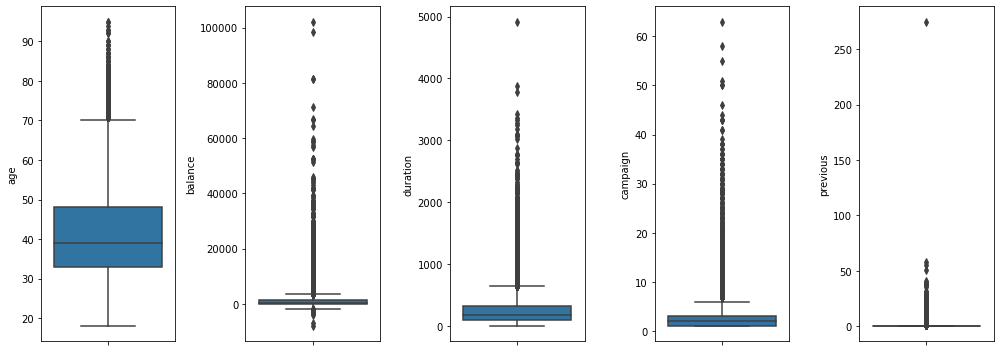

In [ ]:
plt.figure(figsize=(14,5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

## Z-Score

In [ ]:
from scipy import stats

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([True] * len(df1))

for col in nums:
    zscore = abs(stats.zscore(df1[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df1 = df1[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 45204
Jumlah baris setelah memfilter outlier: 41787


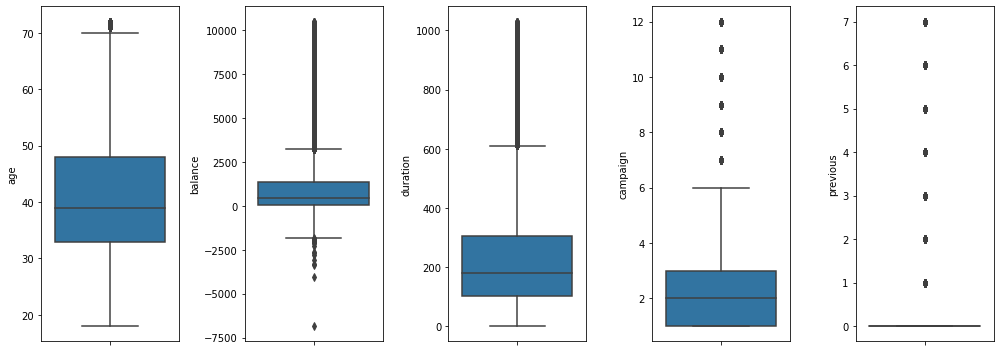

In [ ]:
plt.figure(figsize=(14,5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df1[nums[i]], orient='v')
    plt.tight_layout()

## IQR

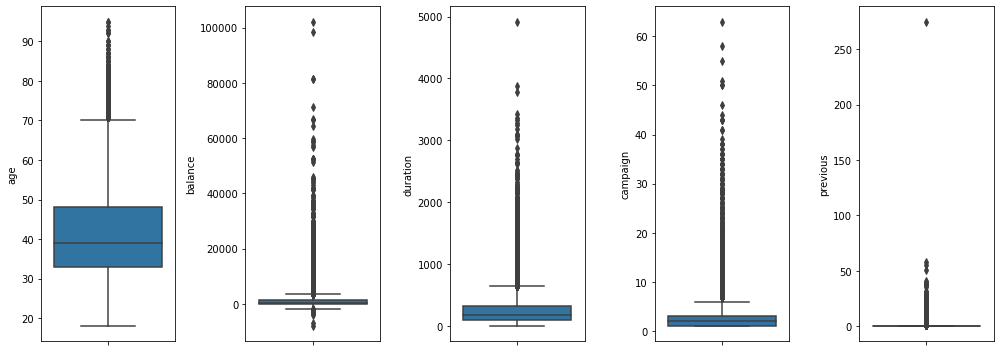

In [ ]:
plt.figure(figsize=(14,5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df2[nums[i]], orient='v')
    plt.tight_layout()

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df2)}')

filtered_entries = np.array([True] * len(df2))
for col in nums:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df2[col] >= low_limit) & (df2[col] <= high_limit)) & filtered_entries
    
df2 = df2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

Jumlah baris sebelum memfilter outlier: 45204
Jumlah baris setelah memfilter outlier: 28186


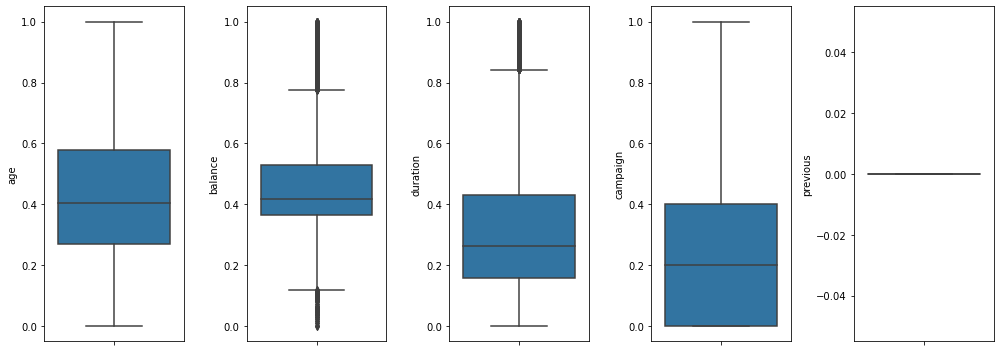

In [ ]:
plt.figure(figsize=(14,5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df2[nums[i]], orient='v')
    plt.tight_layout()

In [ ]:
#gunakan df2 untuk IQR

# Normalization/Standarization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
df2.describe()

,age,balance,duration,campaign,previous,y
count,28186.000000,28186.000000,28186.000000,28186.000000,28186.0,28186.000000
mean,40.373483,606.821010,205.378912,2.189846,0.0,0.056730
std,9.885115,831.998844,139.326609,1.341722,0.0,0.231331
min,18.000000,-1944.000000,0.000000,1.000000,0.0,0.000000
25%,32.000000,31.000000,101.000000,1.000000,0.0,0.000000
50%,39.000000,317.000000,169.000000,2.000000,0.0,0.000000
75%,48.000000,920.750000,277.000000,3.000000,0.0,0.000000
max,70.000000,3462.000000,643.000000,6.000000,0.0,1.000000


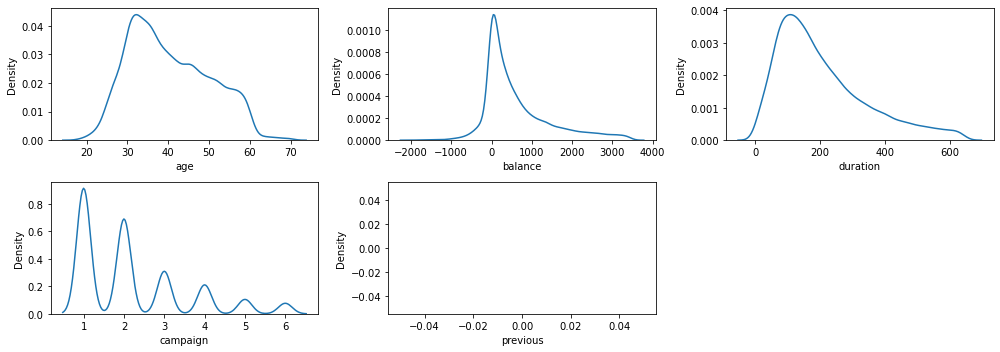

In [ ]:
plt.figure(figsize=(14,5))
for i in range(0, len(nums)):
    plt.subplot(2, (len(nums)+1)/2, i+1)
    sns.kdeplot(x=df2[nums[i]], data=df2)
    plt.tight_layout()

In [ ]:
df2['age']=MinMaxScaler().fit_transform(df2['age'].values.reshape(len(df2), 1))
df2['balance']=MinMaxScaler().fit_transform(df2['balance'].values.reshape(len(df2), 1))

df2['duration']=MinMaxScaler().fit_transform(df2['duration'].values.reshape(len(df2), 1))
df2['campaign']=MinMaxScaler().fit_transform(df2['campaign'].values.reshape(len(df2), 1))

In [ ]:
df2.describe()

,age,balance,duration,campaign,previous,y
count,28186.000000,28186.000000,28186.000000,28186.000000,28186.0,28186.000000
mean,0.430259,0.471850,0.319407,0.237969,0.0,0.056730
std,0.190098,0.153903,0.216682,0.268344,0.0,0.231331
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.269231,0.365335,0.157076,0.000000,0.0,0.000000
50%,0.403846,0.418239,0.262830,0.200000,0.0,0.000000
75%,0.576923,0.529920,0.430793,0.400000,0.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


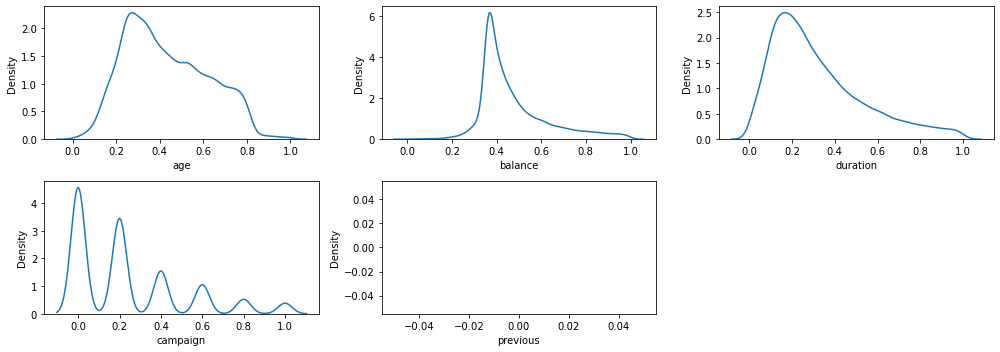

In [ ]:
plt.figure(figsize=(14,5))
for i in range(0, len(nums)):
    plt.subplot(2, (len(nums)+1)/2, i+1)
    sns.kdeplot(np.exp(np.log(df2[nums[i]])))
    plt.tight_layout()

# Feature Encoding

In [ ]:
df2[cats]

,job,default,loan,contact,poutcome
0,management,no,no,unknown,unknown
1,technician,no,no,unknown,unknown
2,entrepreneur,no,yes,unknown,unknown
3,blue-collar,no,no,unknown,unknown
4,unknown,no,no,unknown,unknown
...,...,...,...,...,...
45198,management,no,no,cellular,unknown
45202,admin.,no,no,cellular,unknown
45203,student,no,no,cellular,unknown
45205,technician,no,yes,cellular,unknown


In [ ]:
for cat in cats:
    onehots = pd.get_dummies(df2[cat], prefix=cat)
    df2 = df2.join(onehots)

In [ ]:
df2.sample(5)

,age,job,default,balance,loan,contact,duration,campaign,previous,poutcome,...,job_unemployed,job_unknown,default_no,default_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown
22400,0.384615,technician,no,0.359600,no,cellular,0.127527,1.0,0,unknown,...,0,0,1,0,1,0,1,0,0,1
34340,0.750000,retired,no,0.629301,no,telephone,0.138414,0.8,0,unknown,...,0,0,1,0,1,0,0,1,0,1
2257,0.096154,admin.,no,0.563818,no,unknown,0.186625,0.2,0,unknown,...,0,0,1,0,1,0,0,0,1,1
30040,0.673077,management,no,0.543655,no,cellular,0.311042,0.4,0,unknown,...,0,0,1,0,1,0,1,0,0,1
24735,0.615385,technician,no,0.359600,yes,cellular,0.195956,0.2,0,unknown,...,0,0,1,0,0,1,1,0,0,1


In [ ]:
df2.columns

Index(['age', 'job', 'default', 'balance', 'loan', 'contact', 'duration',
       'campaign', 'previous', 'poutcome', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'default_no', 'default_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_unknown'],
      dtype='object')

In [ ]:
len(df2.columns)

31

In [ ]:
df2_new = df2.drop(columns=cats).copy()

In [ ]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28186 entries, 0 to 45209
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                28186 non-null  float64
 1   balance            28186 non-null  float64
 2   duration           28186 non-null  float64
 3   campaign           28186 non-null  float64
 4   previous           28186 non-null  int64  
 5   y                  28186 non-null  int32  
 6   job_admin.         28186 non-null  uint8  
 7   job_blue-collar    28186 non-null  uint8  
 8   job_entrepreneur   28186 non-null  uint8  
 9   job_housemaid      28186 non-null  uint8  
 10  job_management     28186 non-null  uint8  
 11  job_retired        28186 non-null  uint8  
 12  job_self-employed  28186 non-null  uint8  
 13  job_services       28186 non-null  uint8  
 14  job_student        28186 non-null  uint8  
 15  job_technician     28186 non-null  uint8  
 16  job_unemployed     281

In [ ]:
df2_new

,age,balance,duration,campaign,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,job_unemployed,job_unknown,default_no,default_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown
0,0.769231,0.756012,0.405910,0.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
1,0.500000,0.364965,0.234837,0.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
2,0.288462,0.359970,0.118196,0.0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,1
3,0.557692,0.638180,0.143079,0.0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,1
4,0.288462,0.359785,0.307932,0.0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,0.365385,0.623751,0.517885,0.2,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
45202,0.307692,0.462634,0.348367,0.0,0,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,1
45203,0.096154,0.380503,0.413686,0.0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
45205,0.134615,0.453015,0.600311,0.2,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1


# Imbalance Data

In [ ]:
df2_new['pred']=df2_new['y'] > 0.8
df2_new['pred'].value_counts()

False    26587
True      1599
Name: pred, dtype: int64

In [ ]:
X = df2_new[[col for col in df2_new.columns if (str(df2_new[col].dtype) != 'object') and col not in ['y', 'pred']]]
y = df2_new['pred'].values
print(X.shape)
print(y.shape)

(28186, 25)
(28186,)


In [ ]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    26587
True      1599
dtype: int64
UNDERSAMPLING
False    3198
True     1599
dtype: int64
OVERSAMPLING
False    26587
True     13293
dtype: int64
SMOTE
False    26587
True     13293
dtype: int64
